In [1]:
import cv2
from PIL  import Image
from io import BytesIO
import numpy  as np
from IPython.display import display
import os,sys, readline,glob


In [2]:
def to_pil(ima):
    if ima.dtype == np.float64:
        ima = (ima*255).clip(0,255).astype('uint8')
    return Image.fromarray(ima)


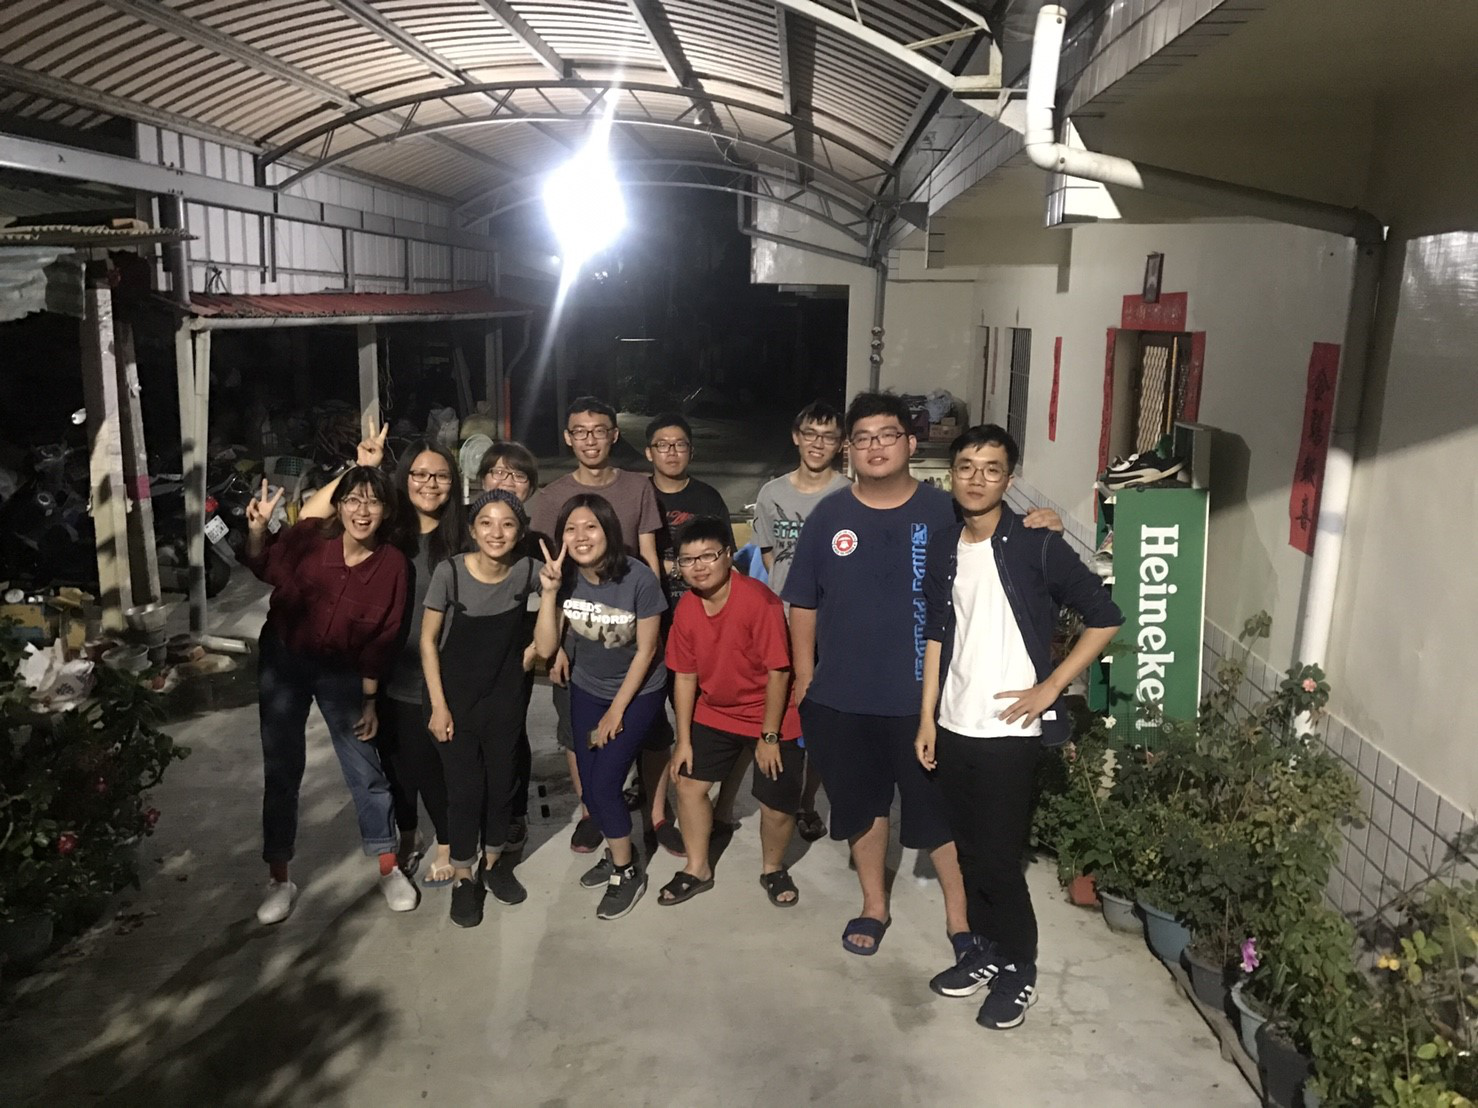

In [3]:
img_url="/Users/leason/Desktop/170611_0003.jpg"
img=Image.open(img_url)
display(img)

In [4]:
img_array=np.array(img)
img_shape=img_array.shape
#img_array=cv2.resize(img_array,(img_shape[1]*2,img_shape[0]*2))
img_gray=cv2.cvtColor(img_array,cv2.COLOR_RGB2GRAY)

In [8]:
to_pil(img_gray)

array([[82, 80, 70, ..., 74, 76, 76],
       [74, 71, 59, ..., 74, 76, 76],
       [55, 54, 44, ..., 74, 74, 73],
       ..., 
       [28, 28, 27, ..., 73, 69, 69],
       [25, 26, 27, ..., 81, 74, 74],
       [21, 24, 28, ..., 86, 77, 76]], dtype=uint8)

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascades/Nariz.xml')


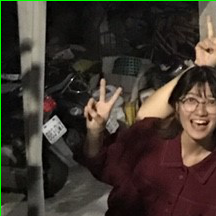

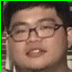

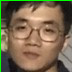

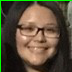

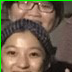

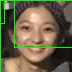

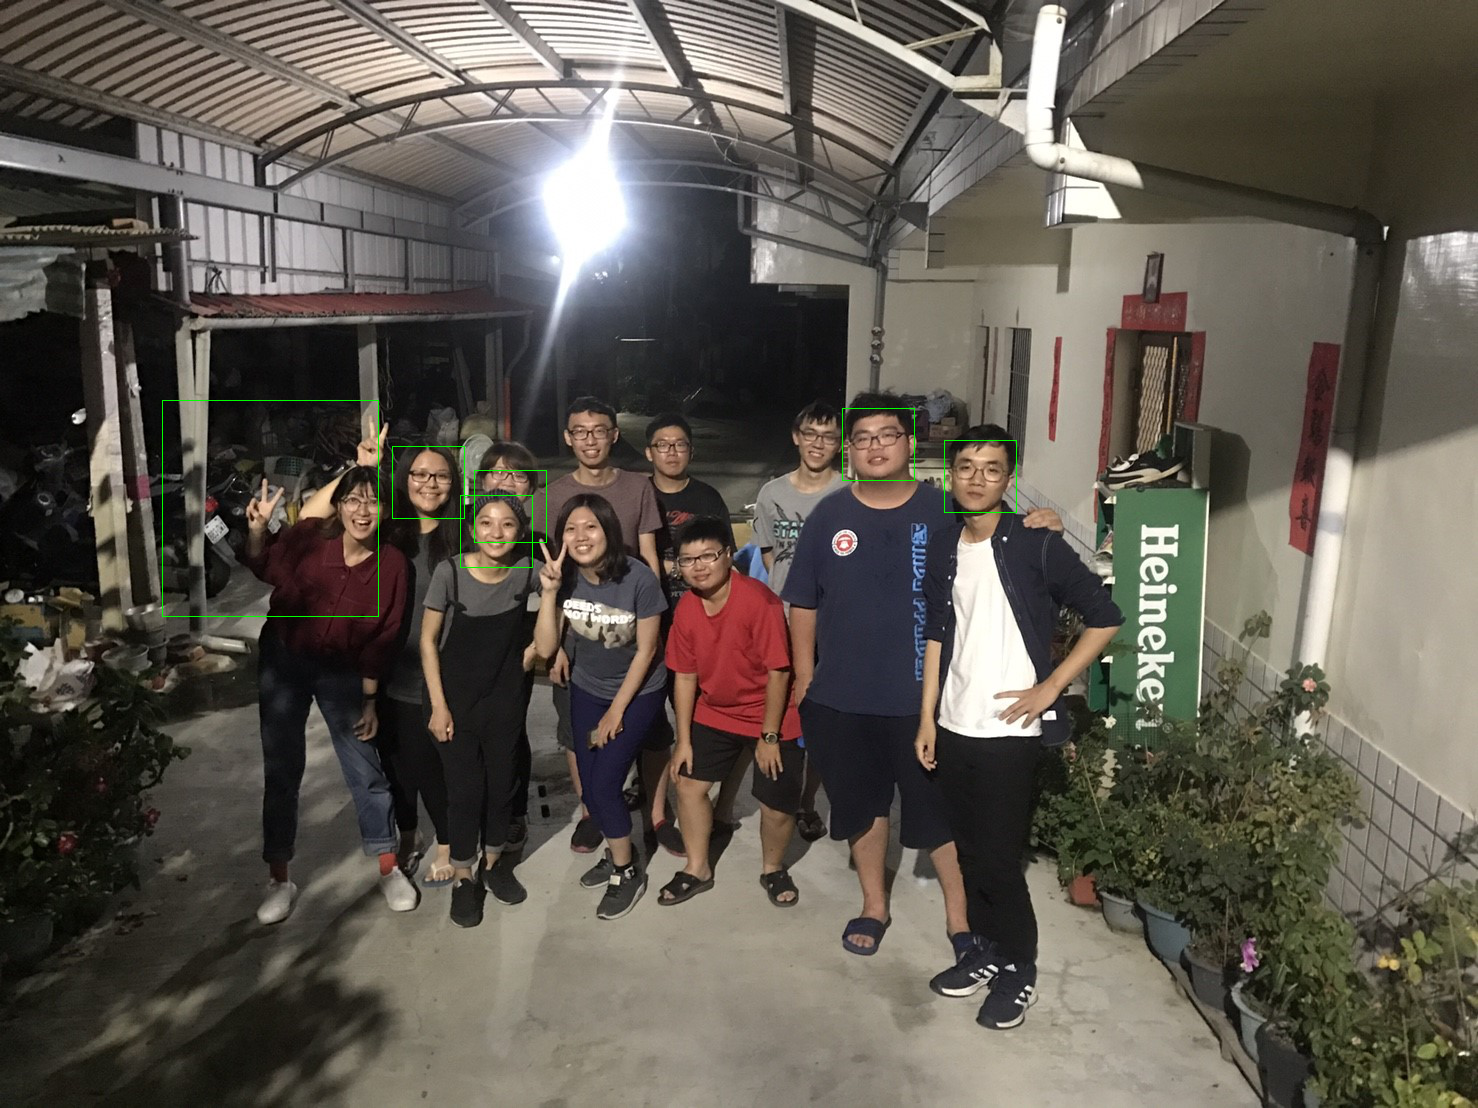

In [7]:
face =face_cascade.detectMultiScale(img_gray,3,1)
for (x,y,w,h) in face:
    cv2.rectangle(img_array,(x,y),(x+w,y+h),(0,255,0),1)
    eye=eye_cascade.detectMultiScale(img_gray[y:y+h,x:x+w],3,2)
    img_face_gray=img_gray[y:y+h,x:x+w]
    img_face=img_array[y:y+h,x:x+w]
    display(to_pil(img_face))
    for (x,y,w,h) in eye:
            cv2.rectangle(img_face,(x,y),(x+w,y+h),(255,0,0),1)
            display(to_pil(img_face[y:y+h,x:x+w]))


to_pil(img_array)

#face 
#    img_face_gray
#    img_face
#eye
#    img_face_gray[y:y+h,x:x+w]
#    img_face[y:y+h,x:x+w]